По уроку 2:
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).



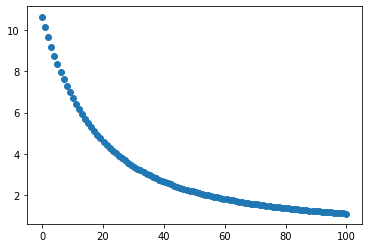

In [10]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
X_st[1] = (X[1] - X1_mean) / X1_std
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W
l = np.linspace(1e-10,100,100)
w = []
for i in l:
    W = eval_model_reg2(X_st,y,iterations=1000,lambda_=i)
    w.append(W)
plt.scatter(l,[i[0] for i in w ])

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?


2. Да ну это , не имеет смысла, так как признаки будут имеет  те же значения без помежуточной операция


3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [11]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
    return W

По уроку 3:
1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.



In [12]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred+1e-10) + (1.0 - y) * np.log(1.0 - y_pred+1e-10))
    err = np.sum(err)
    return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [83]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W
W = eval_model(X_st, y, iterations=5000, alpha=1e6)


/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


500 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.000000082690371e-10
1000 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.000000082690371e-10
1500 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.000000082690371e-10
2000 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.000000082690371e-10
2500 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.000000082690371e-10
3000 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.000000082690371e-10
3500 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.000000082690371e-10
4000 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.000000082690371e-10
4500 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.000000082690371e-10
5000 [-5979386.38509454  -750876.1281605  -1357559.4544502   5333855.25440053] -1.0

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


она же уже реализована sigmoid

In [84]:
z = np.dot(W, X_st)
sigmoid(z)

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).


In [85]:
def calc_pred(W, X_st):
    z = sigmoid(np.dot(W, X_st))
    z[z>+0.5]= 1
    z[z<0.5] = 0
    return z
calc_pred(W, X_st)
    
    

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.


In [86]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
def get_classification_report(y_train_true, y_train_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
get_classification_report(y,calc_pred(W, X_st))

TRAIN

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


6. Могла ли модель переобучиться? Почему?


Модель скорее всего переобучилась, так как выборка слишком маленькая и нет регулизации


7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [91]:
def eval_model_l2(X, y, iterations, alpha=1e-4,lambda_ = 1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * W)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W
def eval_model_l1(X, y, iterations, alpha=1e-4,lambda_ = 1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W


In [92]:
W1 = eval_model_l2(X_st, y, iterations=5000, alpha=1e6)

get_classification_report(y,calc_pred(W1, X_st))

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


500 [-2980385.60349174 -1778632.42802464   -66338.09728426  3282300.22879041] 9.210340371916184
1000 [-2964597.56330639  -970573.1738663    193055.07418444  3575904.35127606] 4.605170185908092
1500 [-2767735.9280712  -1083051.66451101   294396.07719384  4238342.2272545 ] 9.210340371916185
2000 [-2993648.04754679 -2038783.50417609   300767.1777606   3851182.417882  ] 9.210340371916184
2500 [-3100873.70716655 -1849143.86231067   198941.27723728  3540896.89356225] 9.210340371916184
3000 [-2920635.21600155 -1756049.94971716  -144415.09707031  3409429.53865712] 6.907755278912137
3500 [-2960842.37098557 -2062627.98690857   453032.36052696  3820350.23480913] 9.210340371916184
4000 [-2993702.92889743 -1906862.16974359     7427.8637044   3494016.41859849] 9.210340371916184
4500 [-2730778.84029389  -768416.03248828    84224.38867671  3673758.98592956] 4.605170185908092
5000 [-2835174.88340479 -1126324.20006957   485322.94444495  4372438.0485922 ] 9.210340371916185
TRAIN

              precision 

In [93]:
W1 = eval_model_l1(X_st, y, iterations=5000, alpha=1e6)

get_classification_report(y,calc_pred(W1, X_st))

/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


500 [-5979381.52509463  -750871.1881605  -1357556.57445019  5333850.27440061] -1.000000082690371e-10
1000 [-5979376.52509475  -750866.18816049 -1357551.57445019  5333845.27440073] -1.000000082690371e-10
1500 [-5979371.52509486  -750861.18816049 -1357546.57445018  5333840.27440084] -1.000000082690371e-10
2000 [-5979366.52509497  -750856.18816048 -1357541.57445018  5333835.27440095] -1.000000082690371e-10
2500 [-5979361.52509508  -750851.18816048 -1357536.57445017  5333830.27440106] -1.000000082690371e-10
3000 [-5979356.52509519  -750846.18816047 -1357531.57445017  5333825.27440117] -1.000000082690371e-10
3500 [-5979351.52509531  -750841.18816047 -1357526.57445017  5333820.27440128] -1.000000082690371e-10
4000 [-5979346.52509542  -750836.18816046 -1357521.57445016  5333815.2744014 ] -1.000000082690371e-10
4500 [-5979341.52509553  -750831.18816046 -1357516.57445016  5333810.27440151] -1.000000082690371e-10
5000 [-5979336.52509564  -750826.18816046 -1357511.57445015  5333805.27440162] -1.0